In [1]:
import numpy as np
import os
from scipy.sparse import csr_matrix,save_npz,load_npz

def mk_dir(export_dir, quite=False):
    if not os.path.exists(export_dir):
            try:
                os.makedirs(export_dir)
                print('created dir: ', export_dir)
            except OSError as exc: # Guard against race condition
                 if exc.errno != exc.errno.EEXIST:
                    raise
            except Exception:
                pass
    else:
        print('dir already exists: ', export_dir)
def generate_problem(num_nodes,
                     M=1,
                     discretize_bonds=False,
                     num_decimals_R=None):

    # Generate a K_num_nodes (complete graph) Ising weight matrix J with the
    # (+)^num_nodes state as a planted GS.

    # Diagonal of J is zero.

    # Hamiltonian is zero field, i.e:
    # E(s) = -0.5*s'*J*s

    # M specifies the number of columns in W (for M>=num_nodes, FM and
    # easy.)

    # num_decimals_R: number of decimal points to round the uncorrelated
    # Gaussian used to generate the w elements. This is to avoid
    # numerical issues where a spurious state takes over as the GS.

    # Alternatively, can even replace the Gaussian with a bounded
    # range uniform discrete distribution in [-range,+range]...

    # Plants the FM GS
    t = np.ones((num_nodes, 1))

    # Sample correlated Gaussian with covariance matrix sigma
    # Note: rank(sigma) = num_nodes-1
    sigma = num_nodes / (num_nodes - 1.) * np.eye(num_nodes) - 1. / (
        num_nodes - 1) * t.dot(t.T)
    sigma_sqrt = np.sqrt((num_nodes - 1.) / num_nodes) * sigma

    if discretize_bonds:
        R = np.random.choice([-1, 1], (num_nodes, M))
    else:
        R = np.random.randn(num_nodes, M)

        if num_decimals_R is not None:
            R = R.round(decimals=num_decimals_R)

    W = sigma_sqrt.dot(R)
    J_tilde = -1. / num_nodes * W.dot(W.T)
    J = J_tilde - np.diag(np.diag(J_tilde))

    if discretize_bonds:
        J *= num_nodes * num_nodes * (num_nodes - 1)
        J = J.round().astype(int)

    return J

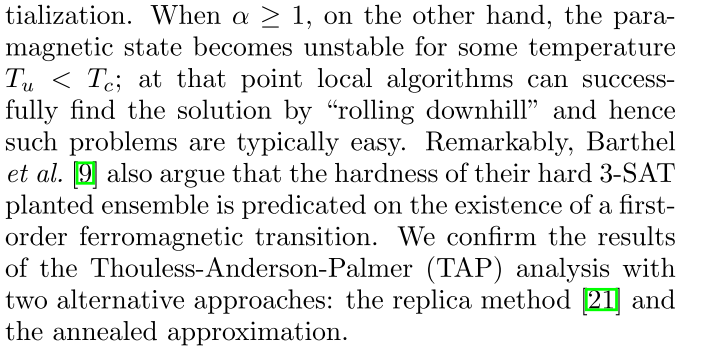

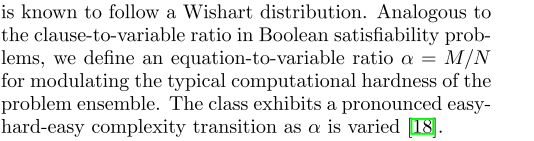

In [2]:
def generate_and_save_graphs(num_nodes=800,
                             M=400,
                             discretize_bonds=False,
                             num_decimals_R=None,
                             num_of_instances=None,
                             save_folder=None
                             ):
    
    folder=f'../data/{save_folder}/wishart_{num_nodes}vertices_m{M}'
    mk_dir(folder)

    for i in range(num_of_instances):
        
    
        graph=generate_problem(num_nodes=num_nodes,
                     M=M,
                     discretize_bonds=False,
                     num_decimals_R=None)
        save_file_name = f'wishart_{num_nodes}vertices_m{M}_graph_{str(i).zfill(4)}'

        save_file_path=os.path.join(folder,save_file_name)
        sparse_matrix = csr_matrix(graph)
            
        save_npz(save_file_path, sparse_matrix)

In [4]:
# generate_and_save_graphs(num_nodes=100,
#                         M=50,
#                         discretize_bonds=False,
#                         num_decimals_R=None,
#                         num_of_instances=4000,
#                         save_folder='training')

# generate_and_save_graphs(num_nodes=100,
#                         M=50,
#                         discretize_bonds=False,
#                         num_decimals_R=None,
#                         num_of_instances=50,
#                         save_folder='validation')

generate_and_save_graphs(num_nodes=100,
                        M=50,
                        discretize_bonds=False,
                        num_decimals_R=None,
                        num_of_instances=100,
                        save_folder='testing')

created dir:  ../data/testing/wishart_100vertices_m50


In [35]:
np.max(mat)

0.12787568420987003